In [7]:
import numpy as np
import pandas as pd

# Show me everything! 
# pd.options.display.max_rows = 999   
# pd.options.display.max_columns = 999 

In [6]:
# !pip install pandas

## Handling missing values

https://medium.com/@roshankg96/handling-missing-data-in-pandas-a3c8dfbd1db

In [2]:
# load dataset
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head(5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [19]:
# df['column_name'] is the same to df.column_name !!!
planets['mass'] is planets.mass

# What way is better to use? 

True

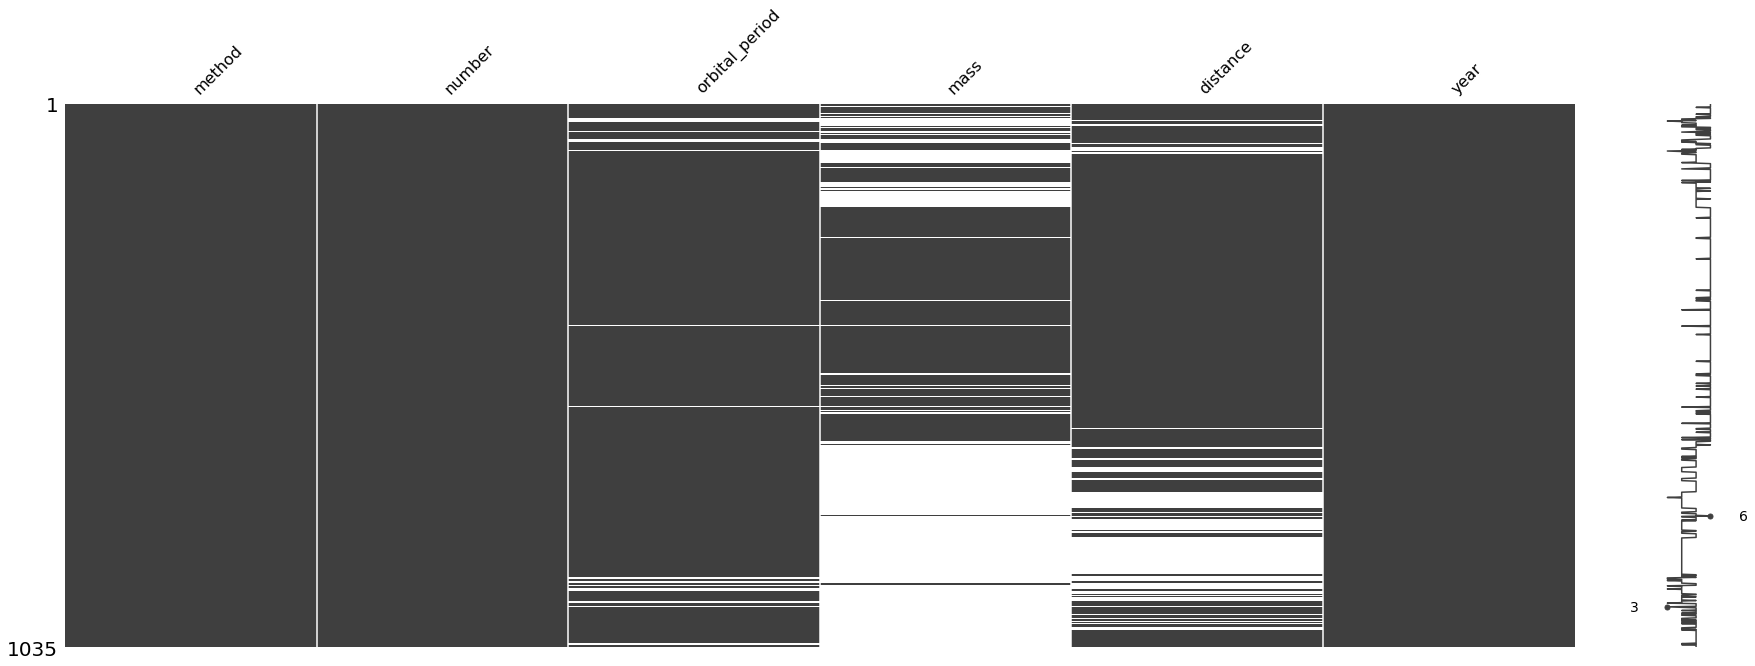

In [3]:
# Vizualize with missingno
# !pip install missingno
import missingno
missingno.matrix(planets, figsize = (30,10));

In [4]:
# Take the most sparse column
planets['mass'].isnull() # opposite is notnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1030     True
1031     True
1032     True
1033     True
1034     True
Name: mass, Length: 1035, dtype: bool

Full table 1035
After dropping NaN 513


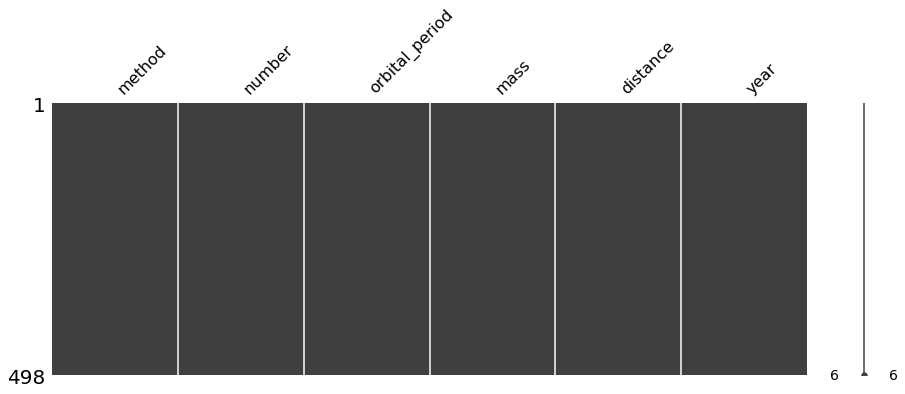

In [5]:
# drop nan
print('Full table', len(planets['mass']))
print('After dropping NaN', len(planets['mass'].dropna()))

# drop rows with nan
missingno.matrix(planets.dropna(), figsize = (15,5));

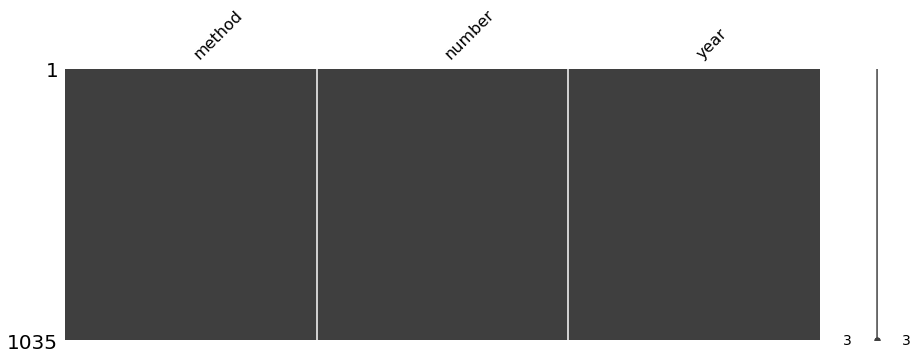

In [6]:
# drop columns with nan
missingno.matrix(planets.dropna(axis='columns'), figsize = (15,5));

In [7]:
# fill nan
planets.fillna(0)    

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,0.00,172.00,2006
1031,Transit,1,2.615864,0.00,148.00,2007
1032,Transit,1,3.191524,0.00,174.00,2007
1033,Transit,1,4.125083,0.00,293.00,2008


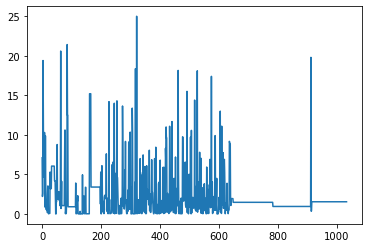

In [8]:
# forward-fill
planets.fillna(method='ffill')['mass'].plot()

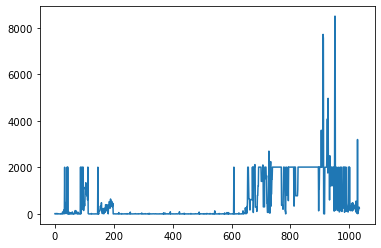

In [9]:
# back-fill
planets.fillna(method='bfill', axis=1)['mass'].plot()

In [10]:
# replace
# planets.replace(to_replace=np.nan, value = 0)

### Exercise
Replace NaN with mean value via the column


## Sorting and filtering tables

https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/

In [11]:
planets.sort_values('distance')

,method,number,orbital_period,mass,distance,year
46,Radial Velocity,1,3.235700,0.0036,1.35,2012
48,Radial Velocity,1,2502.000000,1.5500,3.22,2000
136,Radial Velocity,1,4.693800,0.0350,4.54,2007
145,Radial Velocity,4,124.260000,0.0460,4.70,2010
143,Radial Velocity,4,30.088100,0.7142,4.70,2000
...,...,...,...,...,...,...
989,Transit,1,3.161575,NaN,NaN,2011
997,Transit,1,2.423804,NaN,NaN,2011
998,Transit,1,3.126088,NaN,NaN,2011
999,Transit,1,1.430370,NaN,NaN,2011


In [12]:
# set new column as index
df1 = planets.set_index('year')
df1.sort_index()

,method,number,orbital_period,mass,distance
year,,,,,
1989,Radial Velocity,1,83.888000,11.680,40.57
1992,Pulsar Timing,3,66.541900,NaN,NaN
1992,Pulsar Timing,3,25.262000,NaN,NaN
1994,Pulsar Timing,3,98.211400,NaN,NaN
1995,Radial Velocity,1,4.230785,0.472,15.36
...,...,...,...,...,...
2014,Transit,2,15.965400,NaN,NaN
2014,Transit,2,179.612000,NaN,NaN
2014,Transit,4,6.164860,NaN,NaN


In [13]:
# filtering
planets[planets['method']=='Radial Velocity']

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.3000,7.10,77.40,2006
1,Radial Velocity,1,874.7740,2.21,56.95,2008
2,Radial Velocity,1,763.0000,2.60,19.84,2011
3,Radial Velocity,1,326.0300,19.40,110.62,2007
4,Radial Velocity,1,516.2200,10.50,119.47,2009
...,...,...,...,...,...,...
914,Radial Velocity,1,6.9580,0.34,NaN,2014
915,Radial Velocity,1,5.1180,0.40,NaN,2014
916,Radial Velocity,1,121.7100,1.54,NaN,2014
939,Radial Velocity,1,4.4264,NaN,NaN,2012


In [14]:
# filtering by index
planets.loc[planets.mass>5] # same as planets[planets.mass>5]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
8,Radial Velocity,1,993.300,10.30,73.10,2008
11,Radial Velocity,1,335.100,9.88,39.43,2009
...,...,...,...,...,...,...
620,Radial Velocity,1,745.700,5.30,307.69,2011
636,Radial Velocity,1,124.600,9.18,149.25,2013
637,Radial Velocity,1,17337.500,9.00,23.98,2009
638,Radial Velocity,1,511.098,8.82,31.33,2002


In [15]:
#nsmallest() and nlargest()
planets.nsmallest(3, 'mass', keep='last')

,method,number,orbital_period,mass,distance,year
46,Radial Velocity,1,3.23570,0.00360,1.35,2012
128,Radial Velocity,4,3.14942,0.00600,6.27,2005
263,Radial Velocity,3,40.11400,0.00755,6.06,2011


In [16]:
# Parameters

# ascending=False
# na_position='first'
# inplace=True

## GroupBy: Split, Apply, Combine
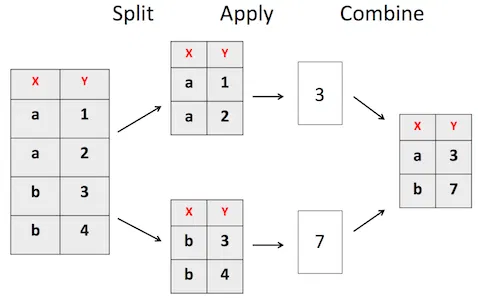

**Aggregation**
- count() Total number of items
- first(), last() First and last item
- mean(), median() Mean and median
- min(), max() Minimum and maximum
- std(), var() Standard deviation and variance
- mad() Mean absolute deviation
- prod() Product of all items
- sum() Sum of all items

In [20]:
# General information
planets.describe()

# BTW, what is 25% and 75% mean? 

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [23]:
planets.mean()

number               1.785507
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64

In [22]:
# GroupBy: Split, Apply, Combine
planets.groupby('method')

In [24]:
planets.groupby('method').mean()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


In [26]:
# column indexing -- results in Series
planets.groupby('method')['orbital_period'].std()

method
Astrometry                          544.217663
Eclipse Timing Variations          2499.130945
Imaging                          213978.177277
Microlensing                       1113.166333
Orbital Brightness Modulation         0.725493
Pulsar Timing                     16313.265573
Pulsation Timing Variations                NaN
Radial Velocity                    1454.926210
Transit                              46.185893
Transit Timing Variations            71.599884
Name: orbital_period, dtype: float64

In [28]:
# describe data of the one column
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [54]:
# agregate method
planets.groupby('year').aggregate(['min', np.median, max])

number            orbital_period                                 mass  \
        min median max            min      median            max       min   
year                                                                         
1989      1      1   1      83.888000   83.888000      83.888000  11.68000   
1992      3      3   3      25.262000   45.901950      66.541900       NaN   
1994      3      3   3      98.211400   98.211400      98.211400       NaN   
1995      1      1   1       4.230785    4.230785       4.230785   0.47200   
1996      1      2   5       3.313500   65.669700    1078.000000   0.68760   
1997      1      1   1      39.845000   39.845000      39.845000   1.04000   
1998      1      2   4       3.097000   58.112890     442.100000   0.52000   
1999      1      1   4       3.510000  256.780000    3810.000000   0.42000   
2000      1      1   4       3.024000  179.665000    2502.000000   0.24900   
2001      1      1   3       6.276000  462.790000    2391.000000   0.54000   
2002      1      1   5       1.211919  505.549000    4909.000000   0.11500   
2003      1      1   3       1.328300  441.470000   36525.000000   0.22900   
2004      1      1   5       1.432475   35.103500    4205.800000   0.08700   
2005      1      1   4       1.937780   68.630000    4270.000000   0.00600   
2006      1      1   4       1.796000  233.150000  730000.000000   0.03300   
2007      1      1   5       1.306186  311.665000    1333.000000   0.03500   
2008      1      1   6       1.091423  226.930000  318280.000000   0.01260   
2009      1      1   3       0.788840  464.700000   17337.500000   0.01600   
2010      1      1   6       1.212884   16.278350   18000.000000   0.01300   
2011      1      2   6       0.090706   20.219180   40000.000000   0.00755   
2012      1      2   6       0.742960   11.738714    6005.000000   0.00360   
2013      1      2   7       0.355000   24.806000    4100.000000   0.00800   
2014      1      2   5       0.669310   12.815900    3827.000000   0.34000   

                      distance                    
       median     max      min   median      max  
year                                              
1989  11.6800  11.680    40.57   40.570    40.57  
1992      NaN     NaN      NaN      NaN      NaN  
1994      NaN     NaN      NaN      NaN      NaN  
1995   0.4720   0.472    15.36   15.360    15.36  
1996   1.6650   3.900    12.53   14.840    21.41  
1997   1.0400   1.040    17.43   17.430    17.43  
1998   1.3900   8.020     4.70   21.290    47.92  
1999   1.9855   8.440    10.91   29.760    59.03  
2000   1.4150  18.100     3.22   32.865    80.00  
2001   2.0700  10.350    14.08   33.650    77.82  
2002   2.2500  17.400    12.53   37.440   121.36  
2003   1.8250  18.370    11.11   35.955   133.16  
2004   1.7900   3.690    10.23   48.950  2500.00  
2005   0.5610  14.000     4.70   35.870   300.30  
2006   0.9435   7.600     8.77   46.940  8500.00  
2007   2.2150  19.800     4.54   80.580  2000.00  
2008   1.9900  25.000     4.94   56.070   680.00  
2009   1.7800  21.420     8.52   52.830   550.00  
2010   0.6000  13.000     4.70   90.000  2700.00  
2011   0.1200  13.650     6.06   87.870  2250.00  
2012   2.3700  11.100     1.35  200.000  7720.00  
2013   0.9665  20.600     6.80  132.000  7560.00  
2014   0.4800   2.580    20.48  272.000  1056.00

### Exersice
1) See all years where the planets was discovered 

2) Take the most fruitful year 

3) Which year is it?

### Bounus: visualization

/home/dzyga/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


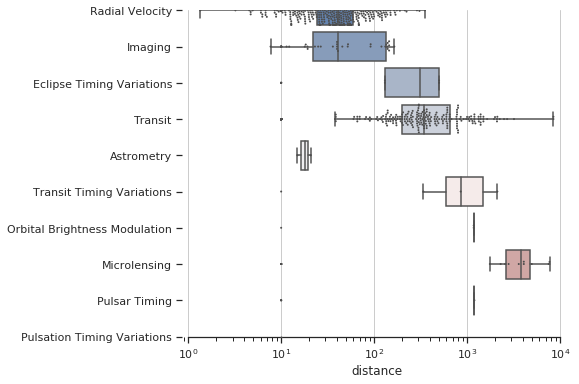

In [63]:
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True);

## Combining tables

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://realpython.com/pandas-merge-join-and-concat/


**There are 3 ways to combine tables**
- merge() for combining data on common columns or indices
- .join() for combining data on a key column or an index
- concat() for combining DataFrames across rows or columns


### Concatenate

In [75]:
df1 = pd.DataFrame({'A': ['A0', 'A1'],
                    'B': ['B0', 'B1'],},
                    index=[0, 1])

df2 = pd.DataFrame({'A': ['A2', 'A3'],
                    'B': ['B2', 'B3'],},
                    index=[2, 3])

frames = [df1, df2]
pd.concat(frames)

In [82]:
df1 = pd.DataFrame({'A': ['A0', 'A1'],
                    'B': ['B0', 'B1'],},
                    index=[0, 1])

df2 = pd.DataFrame({'C': ['C0', 'C1'],
                    'D': ['D0', 'D1'],},
                    index=[0, 1])

frames = [df1, df2]
pd.concat(frames, axis='columns')

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


## With join 

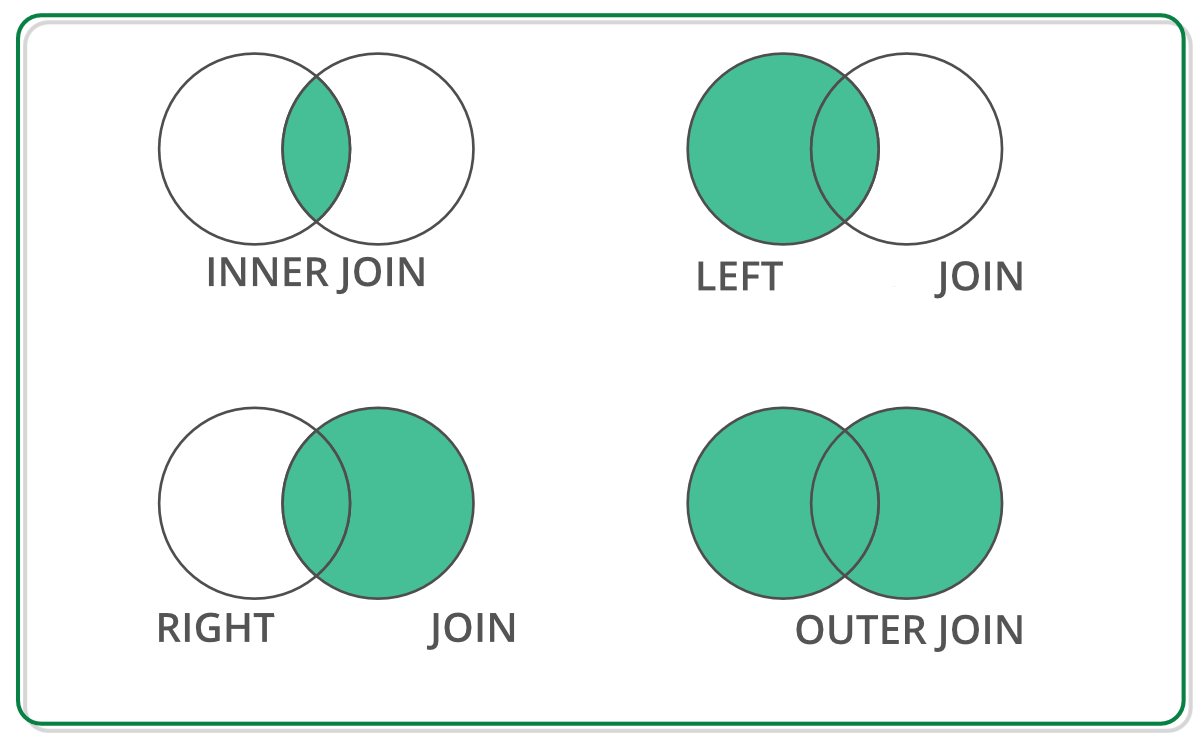

In [1]:
# one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values)
# many-to-one joins: for example when joining an index (unique) to one or more columns in a DataFrame
# many-to-many joins: joining columns on columns.


In [14]:
arr1 = np.array([1, 2, 3, 2, 3, 4, 4, 5, 6])
# arr2 = np.array([[0, 0, 0], [0, 0, 4], [4, 5, 6]])
arr2 = arr1.copy()
arr3 = arr1.view()

print(arr1.flags['OWNDATA'])
print(arr2.flags)
print(arr3.flags)

True
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [13]:
print(arr1.base)

None


In [20]:
# Copy or view? 

df = pd.DataFrame([[1,2,3,4],[5,6,7,8]], index = ['row1','row2'], 
        columns = ['a','b','c','d'])
df2 = df.iloc[0:2, :]
df3 = df.loc[df['a'] == 1, :]

# df is neither copy nor view
print('df is neither copy nor view')
print(df._is_view, df._is_copy)

# df2 is a view AND a copy
print('\ndf2 is a view AND a copy')
print(df2._is_view, df2._is_copy)

# df3 is not a view, but a copy
print('\ndf3 is not a view, but a copy')
print(df3._is_view, df3._is_copy)


df is neither copy nor view
False None

df2 is a view AND a copy
True <weakref at 0x7f5178a56450; to 'DataFrame' at 0x7f51787f27f0>

df3 is not a view, but a copy
False <weakref at 0x7f5178a56450; to 'DataFrame' at 0x7f51787f27f0>
